In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataset import get_manchester

def morisita(a, b, drop_zeros=False, randomize=False):
    if randomize:
        b.index = np.random.permutation(b.index)
    if drop_zeros:
        df = pd.DataFrame({'a': a, 'b': b}).dropna(how='any')
        a, b = df.a, df.b
    else:
        a, b = a.align(b, fill_value=0)
    a = a / a.sum()
    b = b / b.sum()
    numer = np.dot(a, b)
    denom = np.square(a).sum() + np.square(b).sum()
    return 2 * numer / denom

def morisita_child_adult(df, drop_zeros=False):
    child = df[df.speaker.eq('CHI')].ngram.value_counts()
    adult = df[df.speaker.eq('MOT')].ngram.value_counts()
    return morisita(child, adult, drop_zeros=drop_zeros)

In [3]:
unigrams, = get_manchester("/home/paul/corpora/Manchester/**/*", 
                            cached=True, 
                            gram_sizes=[1])

words = (
    unigrams
    [unigrams.speaker.isin(['CHI', 'MOT'])]
    .groupby(['speaker', 'ngram'])
    .size()
    .groupby(level='speaker')
    .apply(lambda x: x.sort_values(ascending=False).head(5))
    .unstack()
    .T
    .dropna()
    .index
    .values
)                                                                                                                                                               

In [4]:
words = unigrams.ngram.value_counts(ascending=False)[:5].index

In [5]:
def per_session_plot(title):
    plt.grid()
    plt.xticks(np.arange(1,35))
    plt.title(title)
    plt.legend()
    plt.xlabel('Session Number')
    plt.ylabel("Morisita's Overlap Index")
    plt.show()

In [6]:
groups = (
    unigrams
    [unigrams.ngram.isin(words)]
    .groupby(['corpus', 'session'])
    .apply(morisita_child_adult)
    .sort_values(ascending=False)
)

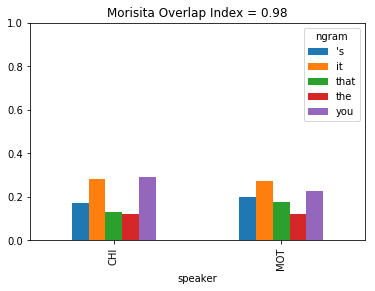

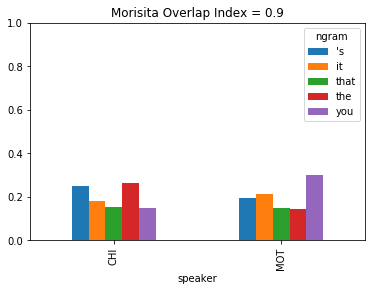

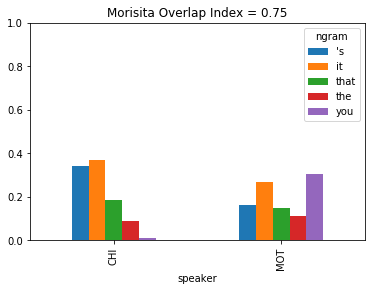

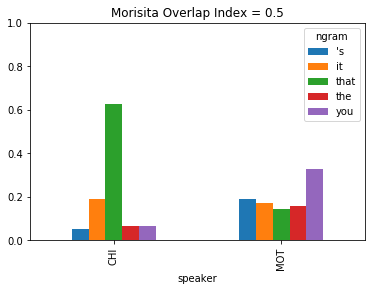

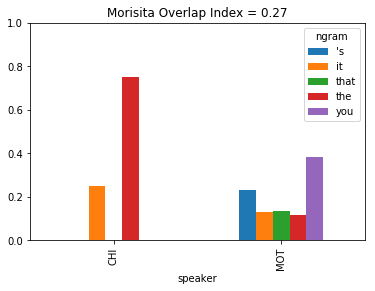

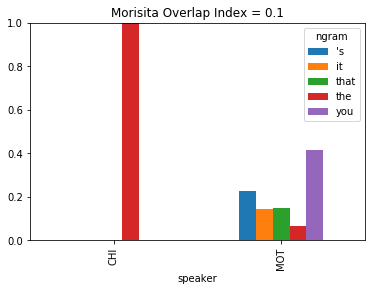

In [7]:
for corpus, session in [groups[groups.lt(moi)].index[0] for moi in [0.99, 0.9, 0.75, 0.5, 0.33, groups.min() + 0.01]]:
    df=unigrams
    df = df[df.ngram.isin(words) 
                  & df.speaker.isin(['MOT', 'CHI'])
                  & df.corpus.eq(corpus) 
                  & df.session.eq(session)]
    counts = (
        df
        .groupby(['speaker', 'ngram'])
        .size()
        .unstack()
    )
    (
        counts
         .div(counts.sum(axis='columns'), axis='index')
         .plot.bar(title='Morisita Overlap Index = {}'.format(groups[(corpus, session)].round(2)))
    )
    plt.ylim(0, 1)

## for corpus, session in [groups[groups.lt(moi)].index[0] for moi in [0.99, 0.9, 0.75, 0.5, 0.33, groups.min() + 0.01]]:
    df=unigrams
    df = df[df.ngram.isin(words) 
                  & df.speaker.isin(['MOT', 'CHI'])
                  & df.corpus.eq(corpus) 
                  & df.session.eq(session)]
    counts = (
        df
        .groupby(['speaker', 'ngram'])
        .size()
        .unstack()
    )
    (
        counts
         .div(counts.sum(axis='columns'), axis='index')
         .T
         .plot.bar(title='Morisita Overlap Index = {}'.format(groups[(corpus, session)].round(2)))
    )